In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

In [5]:
insurance = pd.read_csv('../../finalProject/Data/insurance.csv')

## Data Cleaning



In [6]:
insurance.dropna(inplace = True)
insurance.drop_duplicates(inplace = True)
insurance = insurance.reset_index(drop=True)

length = len(insurance.index)

## String to Binary



In [7]:
def change_to_binary(sex):

    if sex == "male":
        return 0
    elif sex == "female":
        return 1

insurance['sex'] = insurance['sex'].apply(change_to_binary)

def change_to_binary(smoker):

    if smoker == "yes":
        return 0
    elif smoker == "no":
        return 1
insurance['smoker'] = insurance['smoker'].apply(change_to_binary)

def change_to_numerical(region):

    if region == "northeast":
        return 0
    elif region == "southeast":
        return 1
    elif region == "northwest":
        return 2
    elif region == "southwest":
        return 3

insurance['region'] = insurance['region'].apply(change_to_numerical)
insurance.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.9,0,0,3,16884.924


<AxesSubplot:>

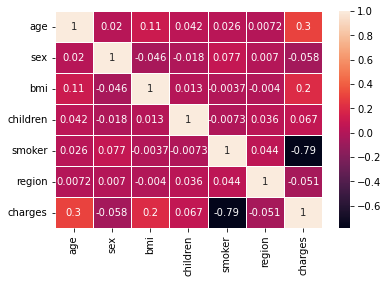

In [8]:
sns.heatmap(insurance.corr(), annot=True, linewidth=.5)

In [7]:
target = insurance["charges"]
input_columns = insurance.loc[:, insurance.columns != "charges"]

In [1]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

NameError: name 'input_columns' is not defined

In [0]:
from sklearn import tree

clf_tree = tree.DecisionTreeRegressor()
clf_tree = clf_tree.fit(x_train, y_train)

In [0]:
y_tree = clf_tree.predict(x_test)

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_tree)

In [2]:
clf_tree.score(x_test, y_test)

NameError: name 'clf_tree' is not defined

In [3]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth" : [5, 10, 15, 20, 25],
    "min_samples_leaf" : [5, 10, 15, 20, 25],
    "min_weight_fraction_leaf" : [0.5],
    "max_leaf_nodes" : [5, 10, 15, 20, 25],
    "min_impurity_decrease" : [1.0, 25.0, 50.0]
    
    }

optimizer = GridSearchCV(tree.DecisionTreeRegressor(), param_grid = parameters)
optimizer.fit(x_train, y_train)

NameError: name 'tree' is not defined

In [0]:
optimizer.best_params_

In [38]:
new_tree = tree.DecisionTreeRegressor(criterion= 'squared_error',max_depth= 5, max_leaf_nodes= 5, min_impurity_decrease= 1.0, min_samples_leaf= 10)
new_tree.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=5, max_leaf_nodes=5, min_impurity_decrease=1.0,
                      min_samples_leaf=10)

In [39]:
ynew_tree = new_tree.predict(x_test)
new_tree.score(x_test, y_test)

0.8111432847879765

In [41]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, ynew_tree)

26283413.704976987